# Opdracht 2.3 - Lineaire regressie

In [2]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Creëer data

In [3]:
a = 2
b = 5

model = lambda x: a * x + b

In [81]:
a = 5
b = 5

model = lambda x: a * np.log(x) + b

In [3]:
a = 0.1
b = 0.2
c = 0

model = lambda x: a*x**2 + b*x + c

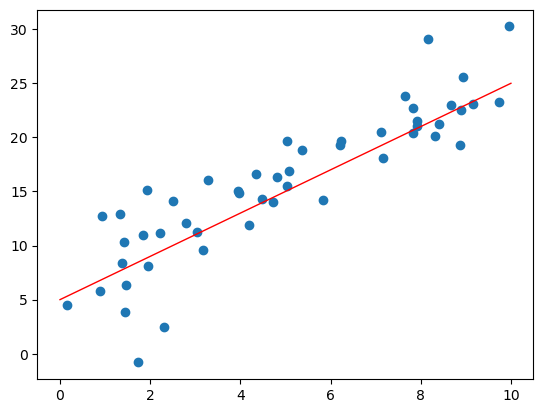

In [4]:
x_min = 0.001
x_max = 10
n = 50

spread = 3

x_model = np.linspace(x_min, x_max, n)
y_model = model(x_model)

x_data = np.random.uniform(x_min, x_max, n)
y_data = model(x_data) + np.random.randn(n) * spread

plt.plot(x_model, y_model, color='red', linewidth=1)
plt.scatter(x_data, y_data)

plt.show()

### Linear Regression using np.polyfit

In [45]:
degree = 1
coefs = np.polyfit(x_data, y_data, degree)

if len(coefs) == 2:
    print('%-15s : %7.3f' % ('slope', coefs[0]))
    print('%-15s : %7.3f' % ('intercept', coefs[1]))
else:
    print('%-15s : %s' % ('coëfficienten', coefs))

slope           :   2.073
intercept       :   5.493


In [46]:
coefs

array([2.07316339, 5.49326524])

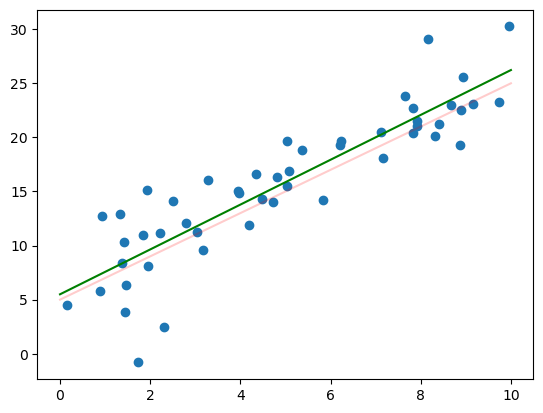

In [47]:
regression = np.poly1d(coefs)

plt.plot(x_model, y_model, 'r', alpha = 0.2)
plt.scatter(x_data, y_data)
plt.plot(x_model, regression(x_model), 'g')

plt.show()

### Metrics

In [48]:
errors = y_data - regression(x_data)
rmse = np.sqrt(np.mean(errors ** 2))
rmse

3.1033872593214897

In [49]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_data, regression(x_data)))

3.1033872593214897

In [50]:
mae = np.mean(np.abs(errors))
mae

2.357086664054097

In [51]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_data, regression(x_data))

2.357086664054097

In [52]:
from sklearn.metrics import r2_score
r2_score(y_data, regression(x_data))

0.7852917829436749

### Other

<AxesSubplot: >

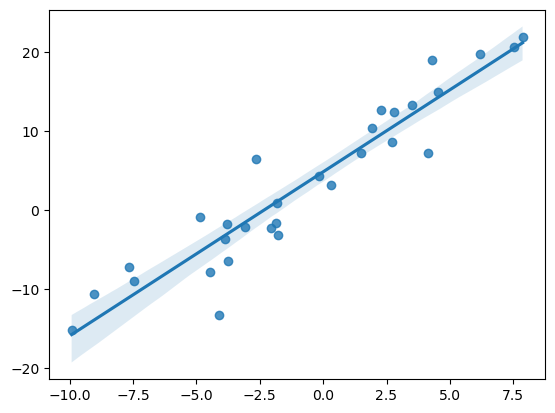

In [31]:
sns.regplot(x=x_data, y=y_data, order=1, fit_reg=True)

In [32]:
np.corrcoef(x_data, y_data)

array([[1.        , 0.94465115],
       [0.94465115, 1.        ]])

### With Scikit Learn

In [55]:
from sklearn.linear_model import LinearRegression

In [68]:
model = LinearRegression(fit_intercept=True)

X = x_data.reshape(-1, 1)   # features
y = y_data                  # target

model.fit(X, y)

y_predicted = model.predict(X)

In [71]:
model.coef_[0], model.intercept_

(2.073163393450966, 5.4932652368999975)

### Linear Regression using scipy.stats.linregress

In [33]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x_data, y_data)

print('%-15s : %7.3f' % ('slope', slope))
print('%-15s : %7.3f' % ('intercept', intercept))
print('%-15s : %7.3f' % ('r value', r_value))
print('%-15s : %7.3f' % ('p value', p_value))
print('%-15s : %7.3f' % ('standard error', std_err))

slope           :   2.077
intercept       :   4.822
r value         :   0.945
p value         :   0.000
standard error  :   0.136


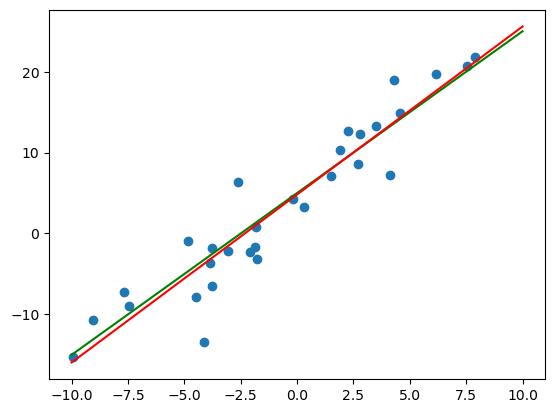

In [34]:
regression = lambda x: x * slope + intercept

plt.plot(x_model, y_model, 'g')
plt.scatter(x_data, y_data)
plt.plot(x_model, regression(x_model), 'r')

plt.show()

### Linear Regression using scipy.optimize.curve_fit

In [110]:
model_to_optimize = lambda x, a, b: a * x + b

parameters, *_ = scipy.optimize.curve_fit(model_to_optimize, x_data, y_data)
slope, intercept = parameters

print('%-15s : %7.3f' % ('slope', slope))
print('%-15s : %7.3f' % ('intercept', intercept))

slope           :   1.920
intercept       :   6.234


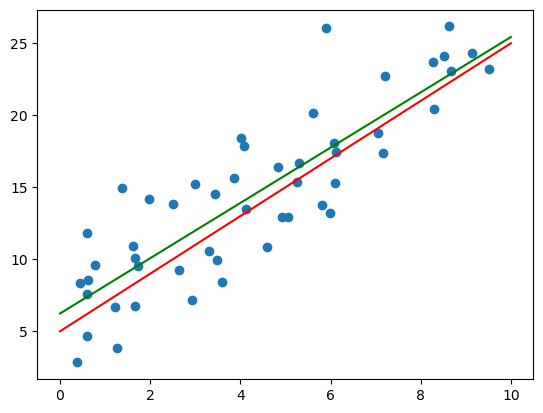

In [112]:
regression = lambda x: x * slope + intercept

plt.plot(x_model, y_model, 'r')
plt.scatter(x_data, y_data)
plt.plot(x_model, regression(x_model), 'g')

plt.show()

### Linear Regression Manually

The regression equation would then be: $ y = \beta_0 + \beta_1(x) +e $

Where $\beta_0$ is the intercept, $\beta_1$ the slope and e the residual error. 

There are five values required for the calculation of a regression line:

- The mean of x: mean_x,
- The mean of y: mean_y,
- The standard deviation of x: sd_x,
- The standard deviation of y: sd_y, and
- The correlation coefficient between x and y: r.

Calculate the slope of this regression line. The general formula for the slope is: $ \beta_1 = r \cdot 
{sd(y)} \;/\; {sd(x)} $

Calculate the intercept. The general formula for the intercept: is $ \beta_0 = mean(y) − \beta_1 \cdot mean(x) $

In [37]:
def calculate_mean_and_std(x):
    n = x.size                    # number of samples
    sum_x = np.sum(x)             # sum of samples
    mean_x = sum_x / n            # mean of samples
    err = x - mean_x              # errors from mean
    sum_err2 = np.sum(err ** 2)   # sum of square errors
    var_x = sum_err2 / (n - 1)    # variance
    std_x = var_x ** 0.5          # standard deviation
    return mean_x, std_x

def calculate_correlation_coefficient(x, y):
    n = x.size
    mean_x, std_x = calculate_mean_and_std(x)
    mean_y, std_y = calculate_mean_and_std(y)
    covariance = np.sum((x - mean_x) * (y - mean_y)) / (n - 1)
    correlation = covariance / (std_x * std_y)
    return correlation

mean_x, std_x = calculate_mean_and_std(x_data)
mean_y, std_y = calculate_mean_and_std(y_data)

r = calculate_correlation_coefficient(x_data, y_data)

print('%-45s : %7.3f' % ('mean of x', mean_x))
print('%-45s : %7.3f' % ('mean of y', mean_y))
print('%-45s : %7.3f' % ('standard deviation of x', std_x))
print('%-45s : %7.3f' % ('standard deviation of y', std_y))
print('%-45s : %7.3f' % ('correlation coefficient between x and y (r)', r))

mean of x                                     :  -0.763
mean of y                                     :   3.237
standard deviation of x                       :   4.784
standard deviation of y                       :  10.518
correlation coefficient between x and y (r)   :   0.945


In [38]:
mean_x = x_data.mean()
mean_y = y_data.mean()
sd_x = x_data.std()
sd_y = y_data.std()
r = np.corrcoef(x_data, y_data)[0, 1]

print('%-45s : %7.3f' % ('mean of x', mean_x))
print('%-45s : %7.3f' % ('mean of y', mean_y))
print('%-45s : %7.3f' % ('standard deviation of x', sd_x))
print('%-45s : %7.3f' % ('standard deviation of y', sd_y))
print('%-45s : %7.3f' % ('correlation coefficient between x and y (r)', r))

mean of x                                     :  -0.763
mean of y                                     :   3.237
standard deviation of x                       :   4.704
standard deviation of y                       :  10.341
correlation coefficient between x and y (r)   :   0.945


In [39]:
slope = r * sd_y / sd_x
intercept = mean_y - slope * mean_x

print('%-15s : %7.3f' % ('slope', slope))
print('%-15s : %7.3f' % ('intercept', intercept))

slope           :   2.077
intercept       :   4.822


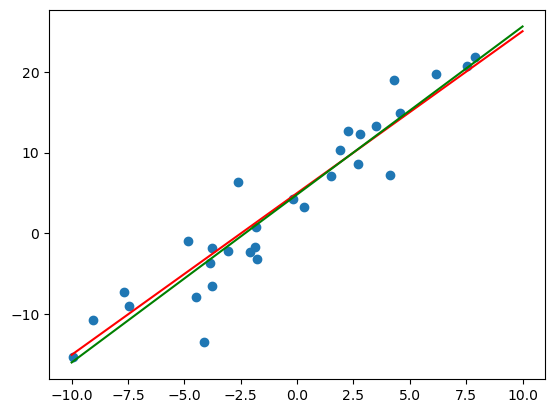

In [40]:
regression = lambda x: x * slope + intercept

plt.plot(x_model, y_model, 'r')
plt.scatter(x_data, y_data)
plt.plot(x_model, regression(x_model), 'g')

plt.show()

### Plot with Seaborn

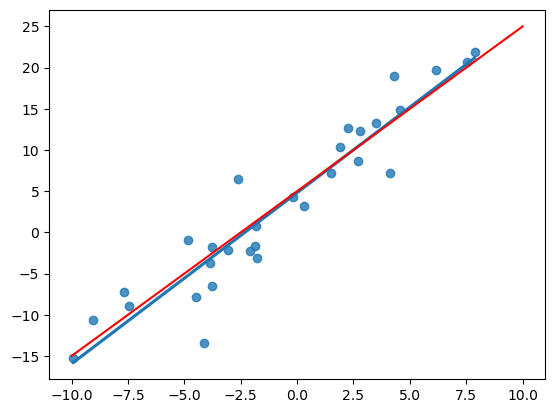

In [41]:
g = sns.regplot(x=x_data, y=y_data, order=1, fit_reg=True, ci=None)
plt.plot(x_model, y_model, 'r')
plt.show()

### Overfitting with higher order model

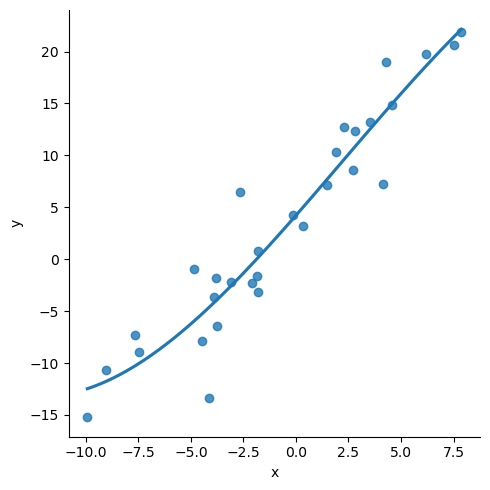

In [42]:
df = pd.DataFrame({'x': x_data, 'y': y_data})
g = sns.lmplot(data=df, x='x', y='y', fit_reg=True, ci=None, order=3)
plt.show()